<a href="https://colab.research.google.com/github/Cfernando71/Cfernando71/blob/main/An%C3%A1liseFraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando bibliotecas
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
#importando dados e criando data frame
df_cd = pd.read_excel('/content/CreditCard.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#verificando valores nulos do data frame
df_cd.isnull().sum()

Time            0
Dimension_0     0
Dimension_1     0
Dimension_3     0
Dimension_4     0
Dimension_5     0
Dimension_6     0
Dimension_7     0
Dimension_8     0
Dimension_9     0
Dimension_10    0
Dimension_11    0
Dimension_12    0
Dimension_13    0
Dimension_14    0
Dimension_15    0
Dimension_16    0
Dimension_17    0
Dimension_18    0
Dimension_19    0
Dimension_20    0
Dimension_21    0
Dimension_22    0
Dimension_23    0
Dimension_24    0
Dimension_25    0
Dimension_26    0
Dimension_27    0
Dimension_28    0
Amount          0
Class           0
dtype: int64

Não há valores nulos. Portanto, não será necessário tratamento especial para dados nulos.

In [4]:
#Verificando quantidade de transaçoes não fraudulentas class = 0 e fraudulentas class =1
df_cd.Class.value_counts()

0    255883
1       443
Name: Class, dtype: int64

Está muito desbalanceado, 255.883 transações não fraudulentas x 443 transações fraudulentas. Portanto, será necessário equilibrar esses dataset.

In [5]:
#Criando data frame com apenas transações nao fraudulentas class = 0
df_no_fraud = df_cd[df_cd.Class == 0]
df_no_fraud

,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256321,172785,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
256322,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
256323,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
256324,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
#Criar data frame com apenas transações fraudulentas class = 1
df_fraud = df_cd[df_cd.Class == 1]
df_fraud

,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
496,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
574,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4466,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
5540,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
5739,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251865,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
252111,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
252117,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
253000,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
#Balanceando o data frame com transações não fraudulentas com a quantidade de transações fraudulentas
df_no_fraud = df_no_fraud.sample(n=443)
df_no_fraud

,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
23757,34025,0.300514,1.147667,0.675069,3.495506,-0.331707,1.136244,-1.444140,-2.279285,-1.062976,...,-1.312213,0.456155,0.046020,0.126455,0.540387,0.339788,0.075442,0.160804,0.76,0
205952,145702,-0.856520,0.882900,0.652102,-0.703861,1.545001,-0.340100,0.701434,-0.984673,-0.658312,...,0.380013,-1.172025,-0.247753,0.630435,0.577339,0.262572,-0.190494,-0.287404,2.69,0
188387,137533,0.231905,0.221828,0.450490,-0.906791,0.503882,0.158551,0.444786,-0.089311,0.852640,...,-0.228450,-0.552302,0.260652,-0.024272,-1.431411,0.035753,-0.177698,-0.085382,26.00,0
180898,133700,-0.807027,0.845037,-0.227397,0.817407,1.170040,-0.305227,1.641177,-0.443541,-0.448571,...,0.013411,0.696522,-0.423108,-0.361534,0.064538,-0.398524,0.343969,0.080035,110.05,0
212649,148765,1.983961,-0.171141,-0.219907,0.452301,-0.584464,-0.723543,-0.338627,-0.184309,1.032308,...,-0.160573,-0.229237,0.354026,0.046236,-0.374680,-0.630301,0.045808,-0.026991,7.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99446,71901,1.046892,-1.278600,0.899054,0.011461,-1.635538,0.365132,-1.330592,0.304561,0.662094,...,0.264841,0.887080,-0.259151,0.082529,0.505238,0.093431,0.076333,0.057458,121.83,0
250300,168058,-1.478269,-0.294739,1.194826,-1.220487,2.404091,-1.804754,1.019443,-1.072058,0.452621,...,-0.491633,-0.509557,-0.719924,0.071544,-0.428486,-0.123762,-0.515311,-0.647865,1.29,0
103642,73815,1.152068,0.295681,0.731431,1.249512,-0.434293,-0.686191,0.064730,-0.199926,-0.085400,...,-0.042930,-0.110069,-0.010972,0.408815,0.448980,-0.487161,0.037307,0.040245,36.00,0
183064,134807,1.584291,-1.474597,-1.004173,-0.646316,-0.926309,-0.435357,-0.395433,-0.070519,1.659639,...,0.302166,0.401885,-0.021877,0.638184,-0.413246,0.657407,-0.096026,-0.004701,260.00,0


In [8]:
# Concatenando os data frame df_no_fraud e df_fraud e resetando o índice.
df = pd.concat([df_no_fraud, df_fraud], axis = 0)
df.reset_index(inplace=True)
df

,index,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
0,23757,34025,0.300514,1.147667,0.675069,3.495506,-0.331707,1.136244,-1.444140,-2.279285,...,-1.312213,0.456155,0.046020,0.126455,0.540387,0.339788,0.075442,0.160804,0.76,0
1,205952,145702,-0.856520,0.882900,0.652102,-0.703861,1.545001,-0.340100,0.701434,-0.984673,...,0.380013,-1.172025,-0.247753,0.630435,0.577339,0.262572,-0.190494,-0.287404,2.69,0
2,188387,137533,0.231905,0.221828,0.450490,-0.906791,0.503882,0.158551,0.444786,-0.089311,...,-0.228450,-0.552302,0.260652,-0.024272,-1.431411,0.035753,-0.177698,-0.085382,26.00,0
3,180898,133700,-0.807027,0.845037,-0.227397,0.817407,1.170040,-0.305227,1.641177,-0.443541,...,0.013411,0.696522,-0.423108,-0.361534,0.064538,-0.398524,0.343969,0.080035,110.05,0
4,212649,148765,1.983961,-0.171141,-0.219907,0.452301,-0.584464,-0.723543,-0.338627,-0.184309,...,-0.160573,-0.229237,0.354026,0.046236,-0.374680,-0.630301,0.045808,-0.026991,7.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,251865,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
882,252111,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
883,252117,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
884,253000,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [9]:
#Selecionando dados para data set de Validação (10 primeiras e 10 últimas linhas)
df_n_fraud = df.head(10)
df_fraud = df.tail(10)

In [10]:
#Retirando os dados de validação ( Exlcuindo as 10 primeiras e 10 últimas linhas)
df= df.iloc[10:]
df= df[:-10]
df

,index,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
10,47499,45673,-2.224591,-0.738729,1.005398,0.007358,0.262740,-0.237594,0.649279,0.451043,...,-0.020875,-0.917774,0.245006,-0.571478,0.593598,0.147525,-0.182173,-0.175111,245.22,0
11,85926,65373,0.519634,-1.709623,-0.432453,-0.777610,-0.809996,0.079937,0.073228,0.033474,...,0.204960,-0.169040,-0.604148,-0.811824,0.614645,-0.611067,-0.017504,0.073209,410.76,0
12,208307,146779,-3.005142,3.245751,-1.628285,-1.090845,-0.108972,-1.185605,0.744452,0.136761,...,-0.038671,1.137997,0.058913,1.070088,-0.263812,-0.299221,1.028083,0.270267,3.76,0
13,14354,27318,0.869022,-1.057472,0.718096,0.355242,-0.551011,1.968120,-1.093059,0.725490,...,-0.018722,0.436313,-0.018264,-1.055171,0.116751,-0.119152,0.121420,0.025274,110.60,0
14,42734,43248,1.012741,0.121655,1.796856,3.952761,-0.421694,1.881019,-0.971979,0.572889,...,-0.072276,0.150923,-0.096503,-0.625735,0.413492,0.173528,0.086248,0.032553,15.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,236750,160791,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
872,236922,160870,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
873,236970,160895,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
874,237451,161154,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1


In [11]:
#Concatenando o dataframe de validação e resetando o seu respectivo index
df_val = pd.concat([df_n_fraud, df_fraud])
df_val.reset_index(inplace=True)
df_val_real = df_val.Class
df_val

,level_0,index,Time,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,...,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount,Class
0,0,23757,34025,0.300514,1.147667,0.675069,3.495506,-0.331707,1.136244,-1.444140,...,-1.312213,0.456155,0.046020,0.126455,0.540387,0.339788,0.075442,0.160804,0.76,0
1,1,205952,145702,-0.856520,0.882900,0.652102,-0.703861,1.545001,-0.340100,0.701434,...,0.380013,-1.172025,-0.247753,0.630435,0.577339,0.262572,-0.190494,-0.287404,2.69,0
2,2,188387,137533,0.231905,0.221828,0.450490,-0.906791,0.503882,0.158551,0.444786,...,-0.228450,-0.552302,0.260652,-0.024272,-1.431411,0.035753,-0.177698,-0.085382,26.00,0
3,3,180898,133700,-0.807027,0.845037,-0.227397,0.817407,1.170040,-0.305227,1.641177,...,0.013411,0.696522,-0.423108,-0.361534,0.064538,-0.398524,0.343969,0.080035,110.05,0
4,4,212649,148765,1.983961,-0.171141,-0.219907,0.452301,-0.584464,-0.723543,-0.338627,...,-0.160573,-0.229237,0.354026,0.046236,-0.374680,-0.630301,0.045808,-0.026991,7.49,0
5,5,45721,44682,-3.641198,-3.491058,1.946154,0.194971,0.790435,-1.229533,-0.470634,...,-0.041285,0.933506,-0.505074,0.568660,0.306969,-0.361886,0.046274,0.345477,366.00,0
6,6,49389,46708,1.173217,-0.391077,-0.146730,0.323268,0.202994,1.100162,-0.425450,...,-0.332556,-0.989981,-0.130586,-1.740179,0.373527,0.302643,-0.027688,-0.011195,49.90,0
7,7,210260,147637,-0.429944,-0.210471,1.133604,-1.578657,0.227182,0.417315,-0.123600,...,-0.482771,-1.087397,0.116580,-0.027529,-0.527306,-0.689501,0.163473,0.165975,30.28,0
8,8,217062,150930,2.013473,-0.989916,-1.142627,-0.531341,-0.393584,0.228506,-0.687650,...,-0.301998,-0.424010,0.153683,0.046660,-0.142906,-0.376307,0.017670,-0.037419,71.02,0
9,9,4394,4330,-1.707745,-0.351156,2.928702,0.907402,-0.920597,1.773509,-0.607451,...,-0.858853,-0.478691,-0.201668,-0.395844,0.313530,-0.116051,0.384833,0.125419,100.00,0


In [12]:
#Retirando colunas desnecessárias do dataframe validação
df_val = df_val.drop(['level_0','index','Time', 'Class'], axis=1)

In [13]:
#Verificando o dataframe validação
df_val

,Dimension_0,Dimension_1,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,Dimension_10,...,Dimension_20,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Amount
0,0.300514,1.147667,0.675069,3.495506,-0.331707,1.136244,-1.444140,-2.279285,-1.062976,-0.068436,...,0.642434,-1.312213,0.456155,0.046020,0.126455,0.540387,0.339788,0.075442,0.160804,0.76
1,-0.856520,0.882900,0.652102,-0.703861,1.545001,-0.340100,0.701434,-0.984673,-0.658312,-0.828577,...,-0.130002,0.380013,-1.172025,-0.247753,0.630435,0.577339,0.262572,-0.190494,-0.287404,2.69
2,0.231905,0.221828,0.450490,-0.906791,0.503882,0.158551,0.444786,-0.089311,0.852640,-0.255825,...,-0.155495,-0.228450,-0.552302,0.260652,-0.024272,-1.431411,0.035753,-0.177698,-0.085382,26.00
3,-0.807027,0.845037,-0.227397,0.817407,1.170040,-0.305227,1.641177,-0.443541,-0.448571,0.797781,...,0.107349,0.013411,0.696522,-0.423108,-0.361534,0.064538,-0.398524,0.343969,0.080035,110.05
4,1.983961,-0.171141,-0.219907,0.452301,-0.584464,-0.723543,-0.338627,-0.184309,1.032308,-0.210449,...,-0.123135,-0.160573,-0.229237,0.354026,0.046236,-0.374680,-0.630301,0.045808,-0.026991,7.49
5,-3.641198,-3.491058,1.946154,0.194971,0.790435,-1.229533,-0.470634,-0.367983,1.523591,-0.764501,...,-0.467302,-0.041285,0.933506,-0.505074,0.568660,0.306969,-0.361886,0.046274,0.345477,366.00
6,1.173217,-0.391077,-0.146730,0.323268,0.202994,1.100162,-0.425450,0.416071,0.718971,-0.036429,...,-0.137565,-0.332556,-0.989981,-0.130586,-1.740179,0.373527,0.302643,-0.027688,-0.011195,49.90
7,-0.429944,-0.210471,1.133604,-1.578657,0.227182,0.417315,-0.123600,0.302315,-0.883703,0.010204,...,-0.412015,-0.482771,-1.087397,0.116580,-0.027529,-0.527306,-0.689501,0.163473,0.165975,30.28
8,2.013473,-0.989916,-1.142627,-0.531341,-0.393584,0.228506,-0.687650,0.049858,-0.188013,0.829977,...,-0.457726,-0.301998,-0.424010,0.153683,0.046660,-0.142906,-0.376307,0.017670,-0.037419,71.02
9,-1.707745,-0.351156,2.928702,0.907402,-0.920597,1.773509,-0.607451,0.244704,2.014614,1.479485,...,0.029804,-0.858853,-0.478691,-0.201668,-0.395844,0.313530,-0.116051,0.384833,0.125419,100.00


In [14]:
#Separando Label and Features para machine learning
X = df.drop(['index', 'Time', 'Class'], axis =1)
y = df['Class']

In [15]:
#Separando dados 80% treino 20% teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42, stratify=y)

In [16]:
#Treinamento com LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train , y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)

f'Acurácia : {acc * 100: .2f}'

'Acurácia :  94.25'

In [17]:
#Prova Real
pred = lr.predict(df_val)
df = pd.DataFrame({'real': df_val_real, 'previsão': pred })
print(df)

    real  previsão
0      0         0
1      0         0
2      0         0
3      0         0
4      0         0
5      0         0
6      0         0
7      0         0
8      0         0
9      0         0
10     1         1
11     1         1
12     1         1
13     1         1
14     1         0
15     1         1
16     1         1
17     1         1
18     1         1
19     1         0


 Para detectar Fraudes em Cartões de CrédiTo um modelo de machine learning eficiente é o Random Forest.
 
 O algoritmo Random Forest (Floresta Aleatória em português) é um algoritmo de aprendizado de máquina utilizado para realizar predições. É um método estatístico, de aprendizagem supervisionada, podendo ser utilizado em problemas de classificação, regressão
 e na realização de previsões.

 Para provar isso foi utilizada uma função que compara os seguintes métodos (Decision Tree, Random Forest e SVC)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
def evaluate_model(models, X_train, X_test, y_train, y_test):
    compare_list = []
    for index,clf in models :
        clf.fit(X_train, y_train)
        y_pred_1 = clf.predict(X_test)
        compare_list.append((pd.Series({"Precision" : precision_score(y_test, y_pred_1,average='macro'),
                           "Recall" : recall_score(y_test, y_pred_1,average='macro'),
                           "F1" : f1_score(y_test, y_pred_1,average='macro'),
                           "Accuracy" : accuracy_score(y_test, y_pred_1),
                           "Train_Score" : clf.score((X_train),y_train),
                           "Test_Score" : clf.score((X_test), y_test)}, name = index)))
    compare_list = pd.DataFrame(compare_list).T
    return compare_list

In [20]:
clf_DT = DecisionTreeClassifier(random_state=0)
clf_RF = RandomForestClassifier(random_state=0)
clf_SVC = SVC(random_state=0)
models = [('DTs',clf_DT), ('RF',clf_RF),('SVC',clf_SVC)]

In [21]:
def highlight(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [22]:
result_1 = evaluate_model(models, X_train, X_test, y_train, y_test)
result_1.style.apply(highlight,axis=1)

,DTs,RF,SVC
Precision,0.897392,0.929888,0.775682
Recall,0.896552,0.925287,0.747126
F1,0.896497,0.925087,0.740404
Accuracy,0.896552,0.925287,0.747126
Train_Score,1.000000,1.000000,0.787572
Test_Score,0.896552,0.925287,0.747126


O resultado acima comprova que para esse problema, o Random Forest é o mais eficiente entre os comparados.


Matriz de Confusão

É uma métrica voltada para modelos de classificação e tem como objetivo calcular a quantidade de falso positivo e falso negativo; e de verdadeiro positivo e verdadeiro negativo, além de te fornecer a acurácia e sensibilidade.

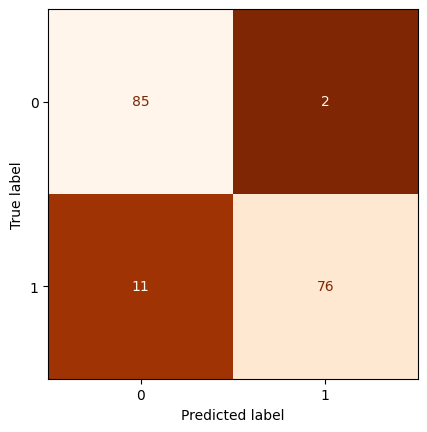

In [23]:
#Criando Matriz de Confusão com Random Forest
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_RF, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

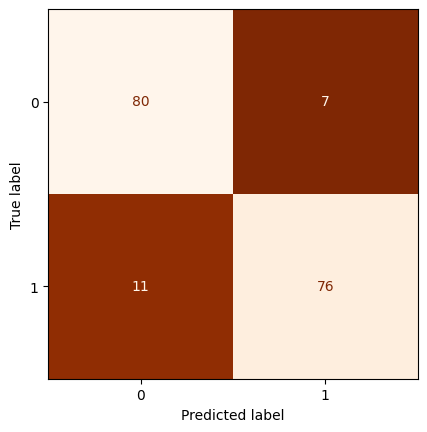

In [24]:
#Criando Matriz de Confusão com Decision Tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_DT, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

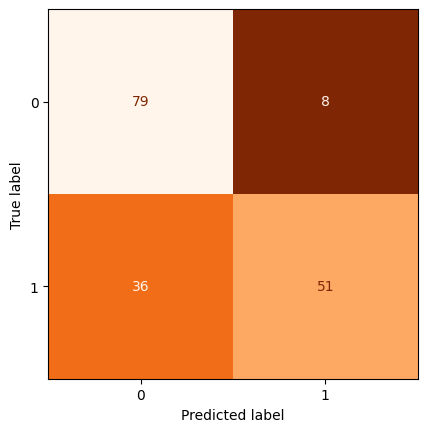

In [25]:
#Criando Matriz de Confusão com Decision Tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_SVC, X_test, y_test, colorbar=False, cmap='Oranges_r')
plt.grid(False)

In [26]:
#Deletando colunas desnecessárias para criar um data frame para utilizar no gráfico PairPlot
df_cor = df_cd.drop(['Time',
'Dimension_0',    
'Dimension_1',    
'Dimension_3',
'Dimension_4',     
'Dimension_5',     
'Dimension_6',     
'Dimension_7',     
'Dimension_8',     
'Dimension_9',     
'Dimension_10',    
'Dimension_11',    
'Dimension_12',    
'Dimension_13',    
'Dimension_14',    
'Dimension_15',    
'Dimension_16',    
'Dimension_17',    
'Dimension_18',    
'Dimension_19',    
'Dimension_20',    
'Dimension_21',    
'Dimension_22',    
'Dimension_23',    
'Dimension_24',    
'Dimension_25',    
'Dimension_26',   
'Dimension_27',    
'Dimension_28' ], axis=1)


In [27]:
print(df_cor)

        Amount  Class
0       149.62      0
1         2.69      0
2       378.66      0
3       123.50      0
4        69.99      0
...        ...    ...
256321    2.69      0
256322    0.77      0
256323   24.79      0
256324   10.00      0
256325  217.00      0

[256326 rows x 2 columns]


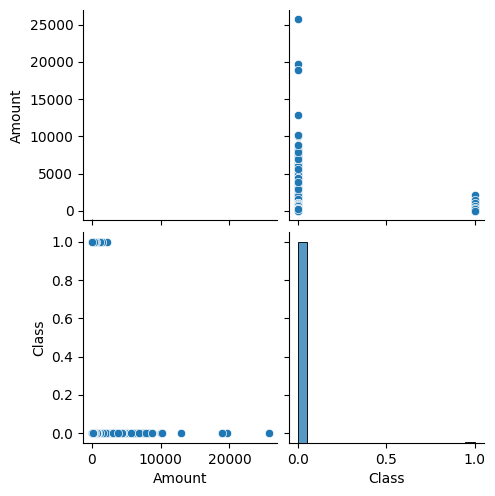

In [28]:
import seaborn as sns
sns.pairplot(df_cor)

O Gráfico Pairplot nos mostra que transações fraudulentas têm maior probabilidade com transações no valor abaixo de 10.000
